In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PRE_PROCESSING

## Upload Data

In [2]:
data = pd.read_csv(r'credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


## Describe all columns

In [3]:
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,...,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,...,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,...,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,...,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,...,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,...,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,...,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


## Where uniqe is too many drop that columns

In [4]:
for i in data[['ID','CustomerID','Name','SSN','TypeofLoan']]:
    data.drop(i,axis=1,inplace=True)

In [5]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore'],
      dtype='object')

In [6]:
data.CreditScore.value_counts()

Standard    46651
Poor        25350
Good        15494
Name: CreditScore, dtype: int64

## Create new column name is 'Score' with binary values

In [7]:
data['Score'] = np.where(data['CreditScore'] == 'Poor', 1, 0 )
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,...,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


## Look value_counts of dependent

In [8]:
data.Score.value_counts()

0    62145
1    25350
Name: Score, dtype: int64

## Look data types

In [9]:
data.dtypes

Month                      object
Age                         int64
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
Score                       int64
dtype: object

## Look if there is missing value

In [10]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
Score                         0
dtype: int64

## Fill missing values with average for numeric and mode for categorical of each columns

In [11]:
for i in data[['Occupation','MonthlyInhandSalary','NumofDelayedPayment','ChangedCreditLimit','NumCreditInquiries','Amountinvestedmonthly','MonthlyBalance']]:
    if data[i].dtypes==object:
        data[i] = data[i].fillna(value=data[i].mode()[0])
    else:
        data[i] = data[i].fillna(value=data[i].mean())

In [12]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
Score                     0
dtype: int64

## Look correlation

In [13]:
corr = data.corr()['Score']
high_corr = corr[abs(corr)>0.01].index.tolist()
high_corr

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/4023594631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['Score']


['MonthlyInhandSalary',
 'Delayfromduedate',
 'ChangedCreditLimit',
 'OutstandingDebt',
 'CreditUtilizationRatio',
 'Amountinvestedmonthly',
 'MonthlyBalance',
 'Score']

In [14]:
data = data[['MonthlyInhandSalary',
             'Delayfromduedate',
             'ChangedCreditLimit',
             'OutstandingDebt',
             'CreditUtilizationRatio',
             'Amountinvestedmonthly',
             'MonthlyBalance',
             'Occupation',
             'Month',
             'PaymentofMinAmount',
             'PaymentBehaviour',
             'Score']]
data

,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,Score
0,1824.843333,3,11.270000,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,4193.181285,-1,11.270000,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,4193.181285,3,10.385851,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,4193.181285,5,6.270000,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,1824.843333,6,11.270000,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,3359.415833,20,9.500000,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,3359.415833,23,11.500000,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,3359.415833,18,11.500000,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,3359.415833,27,11.500000,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

## The columns with vif higher than 5 are removed

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vari = data[[#'MonthlyInhandSalary',
             'Delayfromduedate',
             'ChangedCreditLimit',
             'OutstandingDebt',
             #'CreditUtilizationRatio',
             'Amountinvestedmonthly',
             'MonthlyBalance']]
vif =pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vari.values, i) for i in range(vari.shape[1])]
vif['Features'] = vari.columns
vif

,VIF,Features
0,4.050698,Delayfromduedate
1,3.772889,ChangedCreditLimit
2,4.342809,OutstandingDebt
3,1.749134,Amountinvestedmonthly
4,2.389092,MonthlyBalance


In [16]:
data = data[['Delayfromduedate',
             'ChangedCreditLimit',
             'OutstandingDebt',
             'Amountinvestedmonthly',
             'MonthlyBalance',
             'Occupation',
             'Month',
             'PaymentofMinAmount',
             'PaymentBehaviour',
             'Score']]
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,Score
0,3,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


## Find out if there is Outlier

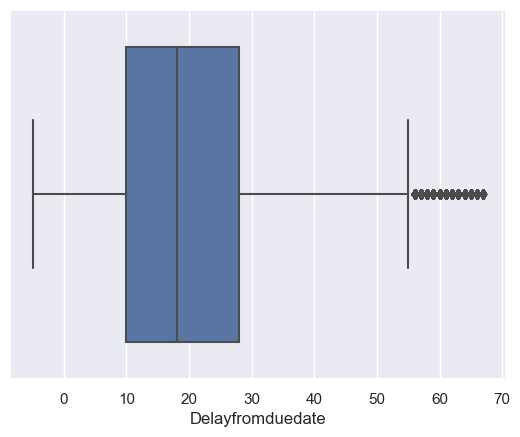

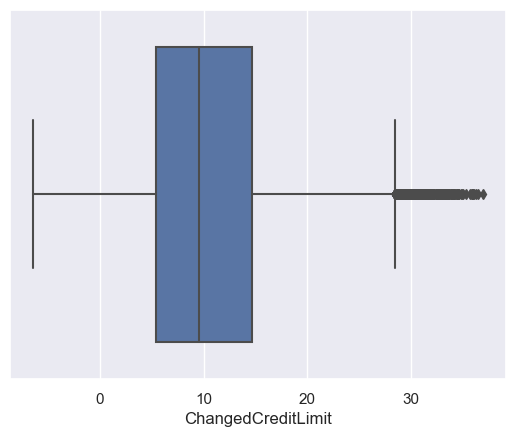

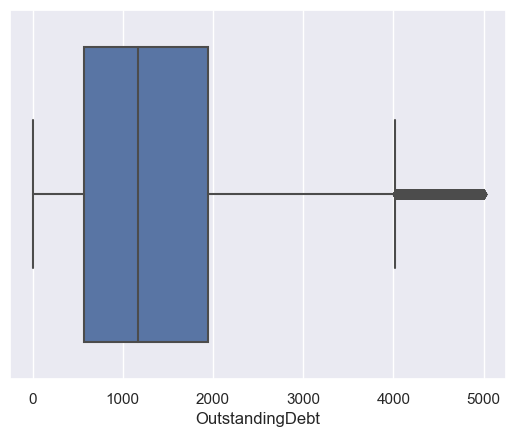

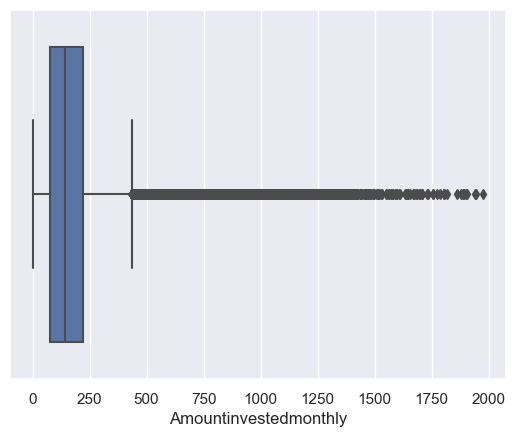

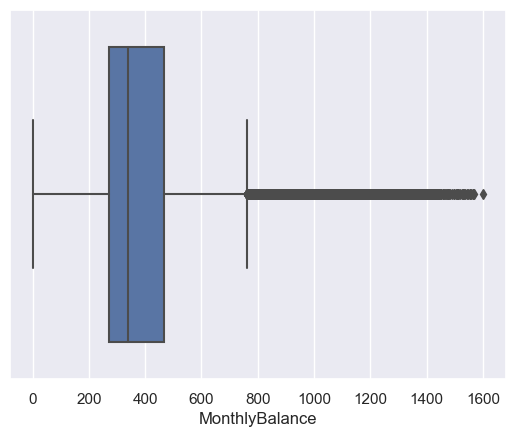

In [17]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data = data, x = data[i])
    plt.show()

## Outlier treatment

In [18]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/59704685.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/59704685.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


In [19]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    data[i] = np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i]<Lower[i],Lower[i],data[i])

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/2378558064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i]>Upper[i],Upper[i],data[i])
/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/2378558064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i]<Lower[i],Lower[i],data[i])


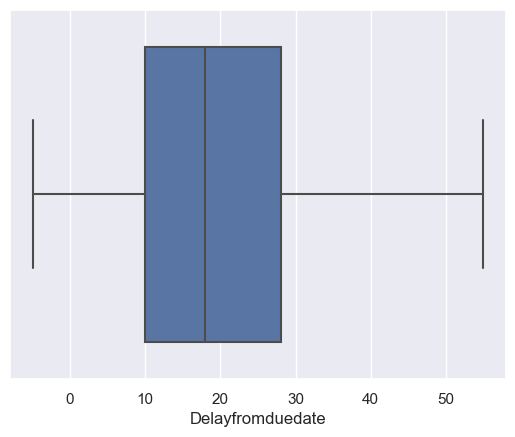

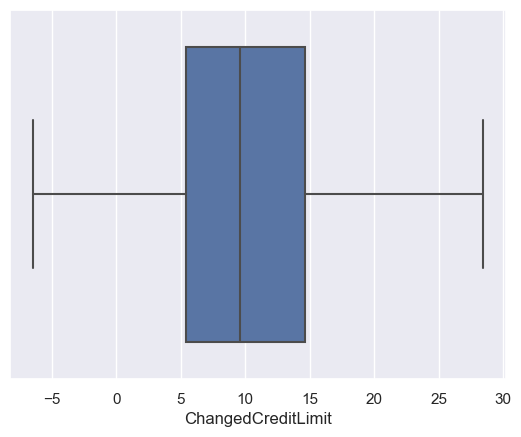

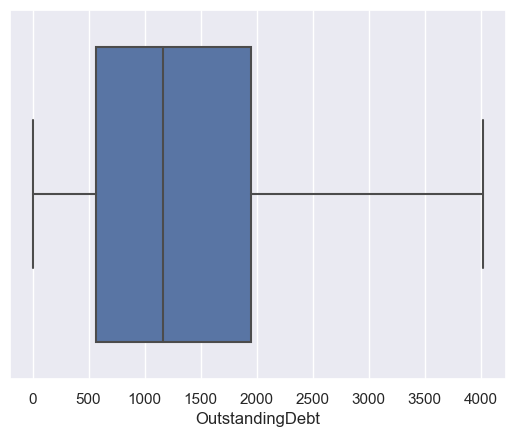

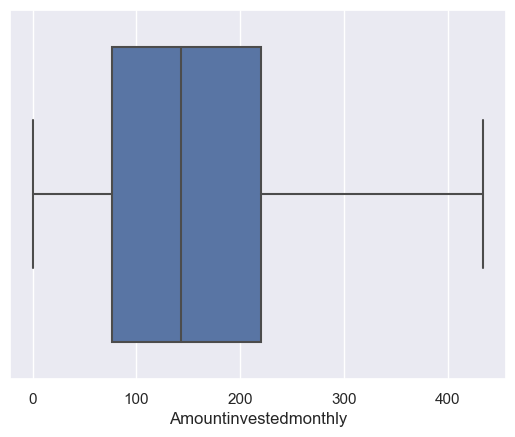

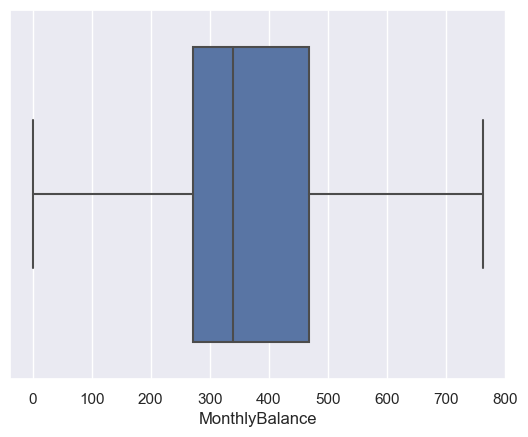

In [20]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data = data, x = data[i])
    plt.show()

In [21]:
data.dtypes

Delayfromduedate         float64
ChangedCreditLimit       float64
OutstandingDebt          float64
Amountinvestedmonthly    float64
MonthlyBalance           float64
Occupation                object
Month                     object
PaymentofMinAmount        object
PaymentBehaviour          object
Score                      int64
dtype: object

## WOE transformation:

## First we have to transform numeric columns to categorical and for that we are using quantile method.

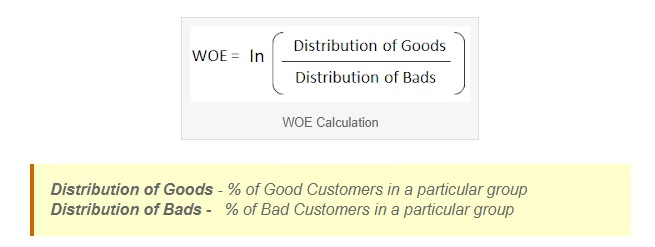

In [22]:
ranges = [-np.inf, data['Delayfromduedate'].quantile(0.25), data['Delayfromduedate'].quantile(0.5), data['Delayfromduedate'].quantile(0.75), np.inf]
data['Delayfromduedate_category'] = pd.cut(data['Delayfromduedate'], bins=ranges)

grouped = data.groupby(['Delayfromduedate_category','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'Delayfromduedate_woe'},inplace=True)
data = data.merge(grouped[['Delayfromduedate_category','Delayfromduedate_woe']],how='left', on='Delayfromduedate_category')

#data

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/858209433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delayfromduedate_category'] = pd.cut(data['Delayfromduedate'], bins=ranges)


In [23]:
ranges = [-np.inf, data['ChangedCreditLimit'].quantile(0.25), data['ChangedCreditLimit'].quantile(0.5), data['ChangedCreditLimit'].quantile(0.75), np.inf]
data['ChangedCreditLimit_category'] = pd.cut(data['ChangedCreditLimit'], bins=ranges)

grouped = data.groupby(['ChangedCreditLimit_category','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'ChangedCreditLimit_woe'},inplace=True)
data = data.merge(grouped[['ChangedCreditLimit_category','ChangedCreditLimit_woe']],how='left', on='ChangedCreditLimit_category')

#data

In [24]:
ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]
data['OutstandingDebt_category'] = pd.cut(data['OutstandingDebt'], bins=ranges)

grouped = data.groupby(['OutstandingDebt_category','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'OutstandingDebt_woe'},inplace=True)
data = data.merge(grouped[['OutstandingDebt_category','OutstandingDebt_woe']],how='left', on='OutstandingDebt_category')

#data

In [25]:
ranges = [-np.inf, data['Amountinvestedmonthly'].quantile(0.25), data['Amountinvestedmonthly'].quantile(0.5), data['Amountinvestedmonthly'].quantile(0.75), np.inf]
data['Amountinvestedmonthly_category'] = pd.cut(data['Amountinvestedmonthly'], bins=ranges)

grouped = data.groupby(['Amountinvestedmonthly_category','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'Amountinvestedmonthly_woe'},inplace=True)
data = data.merge(grouped[['Amountinvestedmonthly_category','Amountinvestedmonthly_woe']],how='left', on='Amountinvestedmonthly_category')

#data

In [26]:
ranges = [-np.inf, data['MonthlyBalance'].quantile(0.25), data['MonthlyBalance'].quantile(0.5), data['MonthlyBalance'].quantile(0.75), np.inf]
data['MonthlyBalance_category'] = pd.cut(data['MonthlyBalance'], bins=ranges)

grouped = data.groupby(['MonthlyBalance_category','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'MonthlyBalance_woe'},inplace=True)
data = data.merge(grouped[['MonthlyBalance_category','MonthlyBalance_woe']],how='left', on='MonthlyBalance_category')

#data

In [27]:
grouped = data.groupby(['Month','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'Month_woe'},inplace=True)
data = data.merge(grouped[['Month','Month_woe']],how='left', on='Month')

#data

In [28]:
grouped = data.groupby(['Occupation','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'Occupation_woe'},inplace=True)
data = data.merge(grouped[['Occupation','Occupation_woe']],how='left', on='Occupation')

#data

In [29]:
grouped = data.groupby(['PaymentofMinAmount','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentofMinAmount_woe'},inplace=True)
data = data.merge(grouped[['PaymentofMinAmount','PaymentofMinAmount_woe']],how='left', on='PaymentofMinAmount')

#data

In [30]:
grouped = data.groupby(['PaymentBehaviour','Score'])['Score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0]/grouped[0].sum()
grouped['negative_prop'] = grouped[1]/grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop']/grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentBehaviour_woe'},inplace=True)
data = data.merge(grouped[['PaymentBehaviour','PaymentBehaviour_woe']],how='left', on='PaymentBehaviour')

#data

In [31]:
data.isnull().sum()

Delayfromduedate                  0
ChangedCreditLimit                0
OutstandingDebt                   0
Amountinvestedmonthly             0
MonthlyBalance                    0
Occupation                        0
Month                             0
PaymentofMinAmount                0
PaymentBehaviour                  0
Score                             0
Delayfromduedate_category         0
Delayfromduedate_woe              0
ChangedCreditLimit_category       0
ChangedCreditLimit_woe            0
OutstandingDebt_category          0
OutstandingDebt_woe               0
Amountinvestedmonthly_category    0
Amountinvestedmonthly_woe         0
MonthlyBalance_category           0
MonthlyBalance_woe                0
Month_woe                         0
Occupation_woe                    0
PaymentofMinAmount_woe            0
PaymentBehaviour_woe              0
dtype: int64

In [32]:
data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour', 'Score',
       'Delayfromduedate_category', 'Delayfromduedate_woe',
       'ChangedCreditLimit_category', 'ChangedCreditLimit_woe',
       'OutstandingDebt_category', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_category', 'Amountinvestedmonthly_woe',
       'MonthlyBalance_category', 'MonthlyBalance_woe', 'Month_woe',
       'Occupation_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe'],
      dtype='object')

## Final data after pre processing

In [33]:
fin_data = data[['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour',
       'Delayfromduedate_category', 'Delayfromduedate_woe',
       'ChangedCreditLimit_category', 'ChangedCreditLimit_woe',
       'OutstandingDebt_category', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_category', 'Amountinvestedmonthly_woe',
       'MonthlyBalance_category', 'MonthlyBalance_woe', 'Month_woe',
       'Occupation_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe','Score']]

fin_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,Delayfromduedate_category,...,OutstandingDebt_woe,Amountinvestedmonthly_category,Amountinvestedmonthly_woe,MonthlyBalance_category,MonthlyBalance_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,Score
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,"(-inf, 10.0]",...,1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.013036,-0.080783,0.97376,0.087011,0
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,"(-inf, 10.0]",...,1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.031453,-0.080783,0.97376,0.057730,0
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,"(-inf, 10.0]",...,1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.021323,-0.080783,0.97376,-0.070569,0
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,"(-inf, 10.0]",...,1.209568,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969,-0.017560,-0.080783,0.97376,-0.315796,0
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,"(-inf, 10.0]",...,1.209568,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456,-0.019930,-0.080783,0.97376,0.182672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,"(18.0, 28.0]",...,1.271917,"(76.962, 143.313]",-0.124014,"(338.591, 467.662]",0.214456,0.021323,-0.053353,0.97376,0.182672,1
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,"(18.0, 28.0]",...,1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.017560,-0.053353,0.97376,0.391003,1
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,"(10.0, 18.0]",...,1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.019930,-0.053353,0.97376,0.182672,1
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,"(18.0, 28.0]",...,1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.030392,-0.053353,0.97376,0.391003,1


## MODELLING

## Inputs and output

In [35]:
inputs = fin_data[['Delayfromduedate_woe', 'ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe',
       'Occupation_woe', 'Month_woe', 'PaymentofMinAmount_woe',
       'PaymentBehaviour_woe']]
output = fin_data['Score']

## Train test split 

In [36]:
X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size = 0.25, random_state = 42)

## Create function to measure confusion matrix,classification report and gini

In [37]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)
    
    return gini_pred
    return gini_prob

## Fit our model

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

## Look our model's performance

In [39]:
result = evaluate(log_reg, X_test, y_test)

Model Performance
Gini pred is 38.62253173332704
Gini prob is 57.94573362194282
[[13442  2040]
 [ 3081  3311]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     15482
           1       0.62      0.52      0.56      6392

    accuracy                           0.77     21874
   macro avg       0.72      0.69      0.70     21874
weighted avg       0.76      0.77      0.76     21874



## Create roc curve graph

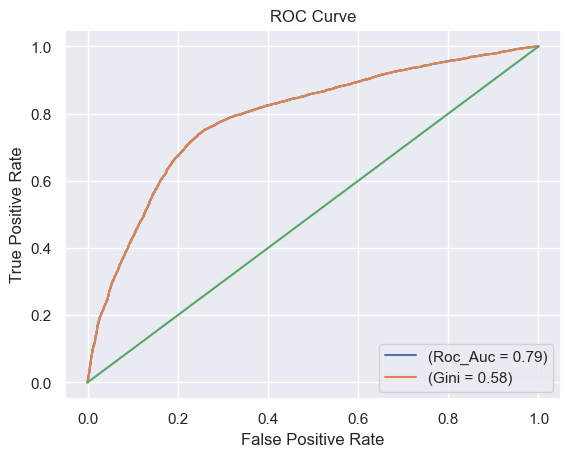

In [40]:
y_prob = log_reg.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# DEPLOYMENT

## Our model showed higher Gini coefficient given 58%, hence we will deploy our trained model on new customers data

In [41]:
test_data = pd.read_excel(r'test_data_LR.xlsx')
test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour
0,CUS0xf55,39,6.37,1527.77,159.687185,538.820919,Entrepreneur,July,Yes,HighspentLargevaluepayments
1,CUS0x24af,6,19.64,281.84,117.147839,590.954834,Mechanic,January,Yes,HighspentMediumvaluepayments
2,CUS0x24af,6,19.64,281.84,51.505834,646.596839,Mechanic,April,Yes,HighspentLargevaluepayments
3,CUS0x24af,6,19.64,281.84,236.795961,501.306712,Mechanic,May,Yes,other
4,CUS0x24af,6,19.64,281.84,64.922693,633.179981,Mechanic,June,Yes,HighspentLargevaluepayments
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,14.76,1375.13,212.556408,678.928544,Lawyer,January,Yes,LowspentLargevaluepayments
1320,CUS0x777b,29,14.76,1375.13,466.000000,367.208375,Lawyer,February,Yes,LowspentSmallvaluepayments
1321,CUS0x777b,29,14.76,1375.13,103.934014,757.550938,Lawyer,March,Yes,HighspentLargevaluepayments
1322,CUS0x777b,29,14.76,1375.13,256.175385,615.309567,Lawyer,April,Yes,other


In [42]:
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,Score,...,OutstandingDebt_category,OutstandingDebt_woe,Amountinvestedmonthly_category,Amountinvestedmonthly_woe,MonthlyBalance_category,MonthlyBalance_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,...,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.013036,-0.080783,0.97376,0.087011
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,...,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.031453,-0.080783,0.97376,0.057730
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,...,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.021323,-0.080783,0.97376,-0.070569
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,...,"(566.4, 1166.23]",1.209568,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969,-0.017560,-0.080783,0.97376,-0.315796
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,...,"(566.4, 1166.23]",1.209568,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456,-0.019930,-0.080783,0.97376,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,...,"(-inf, 566.4]",1.271917,"(76.962, 143.313]",-0.124014,"(338.591, 467.662]",0.214456,0.021323,-0.053353,0.97376,0.182672
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,...,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.017560,-0.053353,0.97376,0.391003
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,...,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.019930,-0.053353,0.97376,0.182672
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,...,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.030392,-0.053353,0.97376,0.391003


In [43]:
data.Delayfromduedate_category.value_counts()

(-inf, 10.0]    23688
(18.0, 28.0]    21574
(10.0, 18.0]    21444
(28.0, inf]     20789
Name: Delayfromduedate_category, dtype: int64

In [44]:
ranges = [-np.inf, data['Delayfromduedate'].quantile(0.25), data['Delayfromduedate'].quantile(0.5), data['Delayfromduedate'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['Delayfromduedate_category'] = pd.cut(test_data['Delayfromduedate'], bins=ranges)

ranges = [-np.inf, data['ChangedCreditLimit'].quantile(0.25), data['ChangedCreditLimit'].quantile(0.5), data['ChangedCreditLimit'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['ChangedCreditLimit_category'] = pd.cut(test_data['ChangedCreditLimit'], bins=ranges)

ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['OutstandingDebt_category'] = pd.cut(test_data['OutstandingDebt'], bins=ranges)

ranges = [-np.inf, data['Amountinvestedmonthly'].quantile(0.25), data['Amountinvestedmonthly'].quantile(0.5), data['Amountinvestedmonthly'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['Amountinvestedmonthly_category'] = pd.cut(test_data['Amountinvestedmonthly'], bins=ranges)

ranges = [-np.inf, data['MonthlyBalance'].quantile(0.25), data['MonthlyBalance'].quantile(0.5), data['MonthlyBalance'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['MonthlyBalance_category'] = pd.cut(test_data['MonthlyBalance'], bins=ranges)

#test_data

In [45]:
test_data = test_data.merge(data[['Delayfromduedate_category','Delayfromduedate_woe']].drop_duplicates(subset='Delayfromduedate_category'), how='left', on='Delayfromduedate_category')
test_data = test_data.merge(data[['ChangedCreditLimit_category','ChangedCreditLimit_woe']].drop_duplicates(subset='ChangedCreditLimit_category'), how='left', on='ChangedCreditLimit_category')
test_data = test_data.merge(data[['OutstandingDebt_category','OutstandingDebt_woe']].drop_duplicates(subset='OutstandingDebt_category'), how='left', on='OutstandingDebt_category')
test_data = test_data.merge(data[['Amountinvestedmonthly_category','Amountinvestedmonthly_woe']].drop_duplicates(subset='Amountinvestedmonthly_category'), how='left', on='Amountinvestedmonthly_category')
test_data = test_data.merge(data[['MonthlyBalance_category','MonthlyBalance_woe']].drop_duplicates(subset='MonthlyBalance_category'), how='left', on='MonthlyBalance_category')
test_data = test_data.merge(data[['Occupation','Occupation_woe']].drop_duplicates(subset='Occupation'), how='left', on='Occupation')
test_data = test_data.merge(data[['Month','Month_woe']].drop_duplicates(subset='Month'), how='left', on='Month')
test_data = test_data.merge(data[['PaymentofMinAmount','PaymentofMinAmount_woe']].drop_duplicates(subset='PaymentofMinAmount'), how='left', on='PaymentofMinAmount')
test_data = test_data.merge(data[['PaymentBehaviour','PaymentBehaviour_woe']].drop_duplicates(subset='PaymentBehaviour'), how='left', on='PaymentBehaviour')

test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,...,MonthlyBalance_category,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0xf55,39,6.37,1527.77,159.687185,538.820919,Entrepreneur,July,Yes,HighspentLargevaluepayments,...,"(467.662, inf]",-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003
1,CUS0x24af,6,19.64,281.84,117.147839,590.954834,Mechanic,January,Yes,HighspentMediumvaluepayments,...,"(467.662, inf]",1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672
2,CUS0x24af,6,19.64,281.84,51.505834,646.596839,Mechanic,April,Yes,HighspentLargevaluepayments,...,"(467.662, inf]",1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003
3,CUS0x24af,6,19.64,281.84,236.795961,501.306712,Mechanic,May,Yes,other,...,"(467.662, inf]",1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414
4,CUS0x24af,6,19.64,281.84,64.922693,633.179981,Mechanic,June,Yes,HighspentLargevaluepayments,...,"(467.662, inf]",1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,14.76,1375.13,212.556408,678.928544,Lawyer,January,Yes,LowspentLargevaluepayments,...,"(467.662, inf]",-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730
1320,CUS0x777b,29,14.76,1375.13,466.000000,367.208375,Lawyer,February,Yes,LowspentSmallvaluepayments,...,"(338.591, 467.662]",-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796
1321,CUS0x777b,29,14.76,1375.13,103.934014,757.550938,Lawyer,March,Yes,HighspentLargevaluepayments,...,"(467.662, inf]",-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003
1322,CUS0x777b,29,14.76,1375.13,256.175385,615.309567,Lawyer,April,Yes,other,...,"(467.662, inf]",-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414


In [46]:
test_data.isnull().sum()

CustomerID                        0
Delayfromduedate                  0
ChangedCreditLimit                0
OutstandingDebt                   0
Amountinvestedmonthly             0
MonthlyBalance                    0
Occupation                        0
Month                             0
PaymentofMinAmount                0
PaymentBehaviour                  0
Delayfromduedate_category         0
ChangedCreditLimit_category       0
OutstandingDebt_category          0
Amountinvestedmonthly_category    0
MonthlyBalance_category           0
Delayfromduedate_woe              0
ChangedCreditLimit_woe            0
OutstandingDebt_woe               0
Amountinvestedmonthly_woe         0
MonthlyBalance_woe                0
Occupation_woe                    0
Month_woe                         0
PaymentofMinAmount_woe            0
PaymentBehaviour_woe              0
dtype: int64

In [47]:
test_data.columns

Index(['CustomerID', 'Delayfromduedate', 'ChangedCreditLimit',
       'OutstandingDebt', 'Amountinvestedmonthly', 'MonthlyBalance',
       'Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour',
       'Delayfromduedate_category', 'ChangedCreditLimit_category',
       'OutstandingDebt_category', 'Amountinvestedmonthly_category',
       'MonthlyBalance_category', 'Delayfromduedate_woe',
       'ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe',
       'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe'],
      dtype='object')

In [48]:
test_data_woe = test_data[['CustomerID','Delayfromduedate_woe',
       'ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe',
       'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe']]
test_data_woe

,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0xf55,-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003
1,CUS0x24af,1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672
2,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003
3,CUS0x24af,1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414
4,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730
1320,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796
1321,CUS0x777b,-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003
1322,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414


In [49]:
prob = log_reg.predict_proba(test_data_woe.iloc[:,1:])[:,1]

In [50]:
test_data_woe['PD'] = prob
test_data_woe

/var/folders/vp/sgk1_hlx22xd7xk0vzygtjr80000gn/T/ipykernel_1974/2561058433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_woe['PD'] = prob


,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,PD
0,CUS0xf55,-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003,0.486117
1,CUS0x24af,1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672,0.049684
2,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003,0.045304
3,CUS0x24af,1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414,0.050281
4,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003,0.045912
...,...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730,0.264498
1320,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796,0.404525
1321,CUS0x777b,-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003,0.325450
1322,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414,0.365155
